# FRAUDULENT CLAIM IN AUTO INSURANCE ANALYSIS



In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
# Load the dataset
#df = pd.read_csv('insurance_claims.csv')
#print(f'shape of dataset : {df.shape}')
#df.head()

#Load the insurance_claims csv file into the dataframe
df = pd.read_csv('insurance_claims.csv')
#Show the dataframe of the first 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25/1/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27/6/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21/1/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25/5/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/1/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17/2/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
# Replace 'column_name' with the actual name of the column you want to analyze
column_name = 'vehicle_claim'

In [ ]:
# Find the highest and lowest values in the column
highest_value = df[column_name].max()
lowest_value = df[column_name].min()

print(f'Highest value in {column_name}: {highest_value}')
print(f'Lowest value in {column_name}: {lowest_value}')

Highest value in vehicle_claim: 79560
Lowest value in vehicle_claim: 70


In [ ]:
# Handle the value
df.replace('?', np.nan, inplace = True) # replacing '?' with 'nan' value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Describe the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [ ]:
# Display missing values
df.isna().sum() / len(df) * 100

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p


# Missing Value Adjustment

In [ ]:
# Handle the missing value
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [ ]:
# Display sum of missing value
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

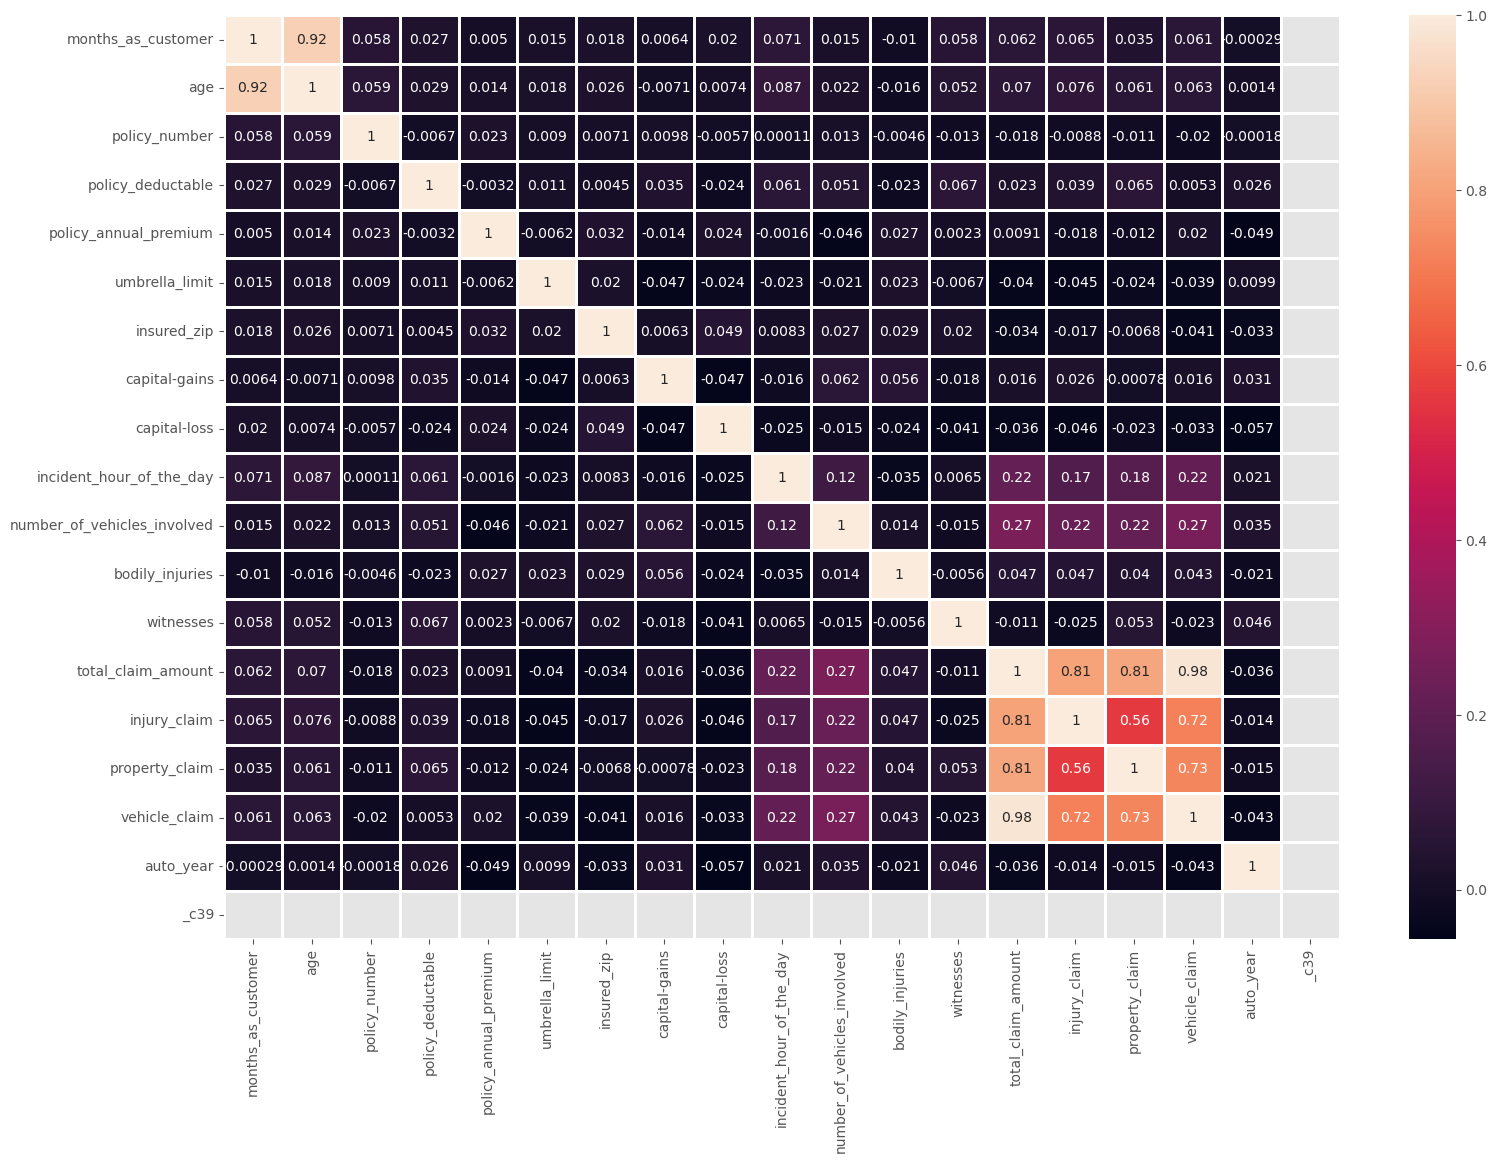

In [ ]:
# Plot a heatmap
# To show relationships between two variables

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
# Display number of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [ ]:
# Drop unecessary columns for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
    'insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
# Display the shape of data
print(f'shape of dataset: {df.shape}')
df.head()

shape of dataset: (1000, 29)


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,N


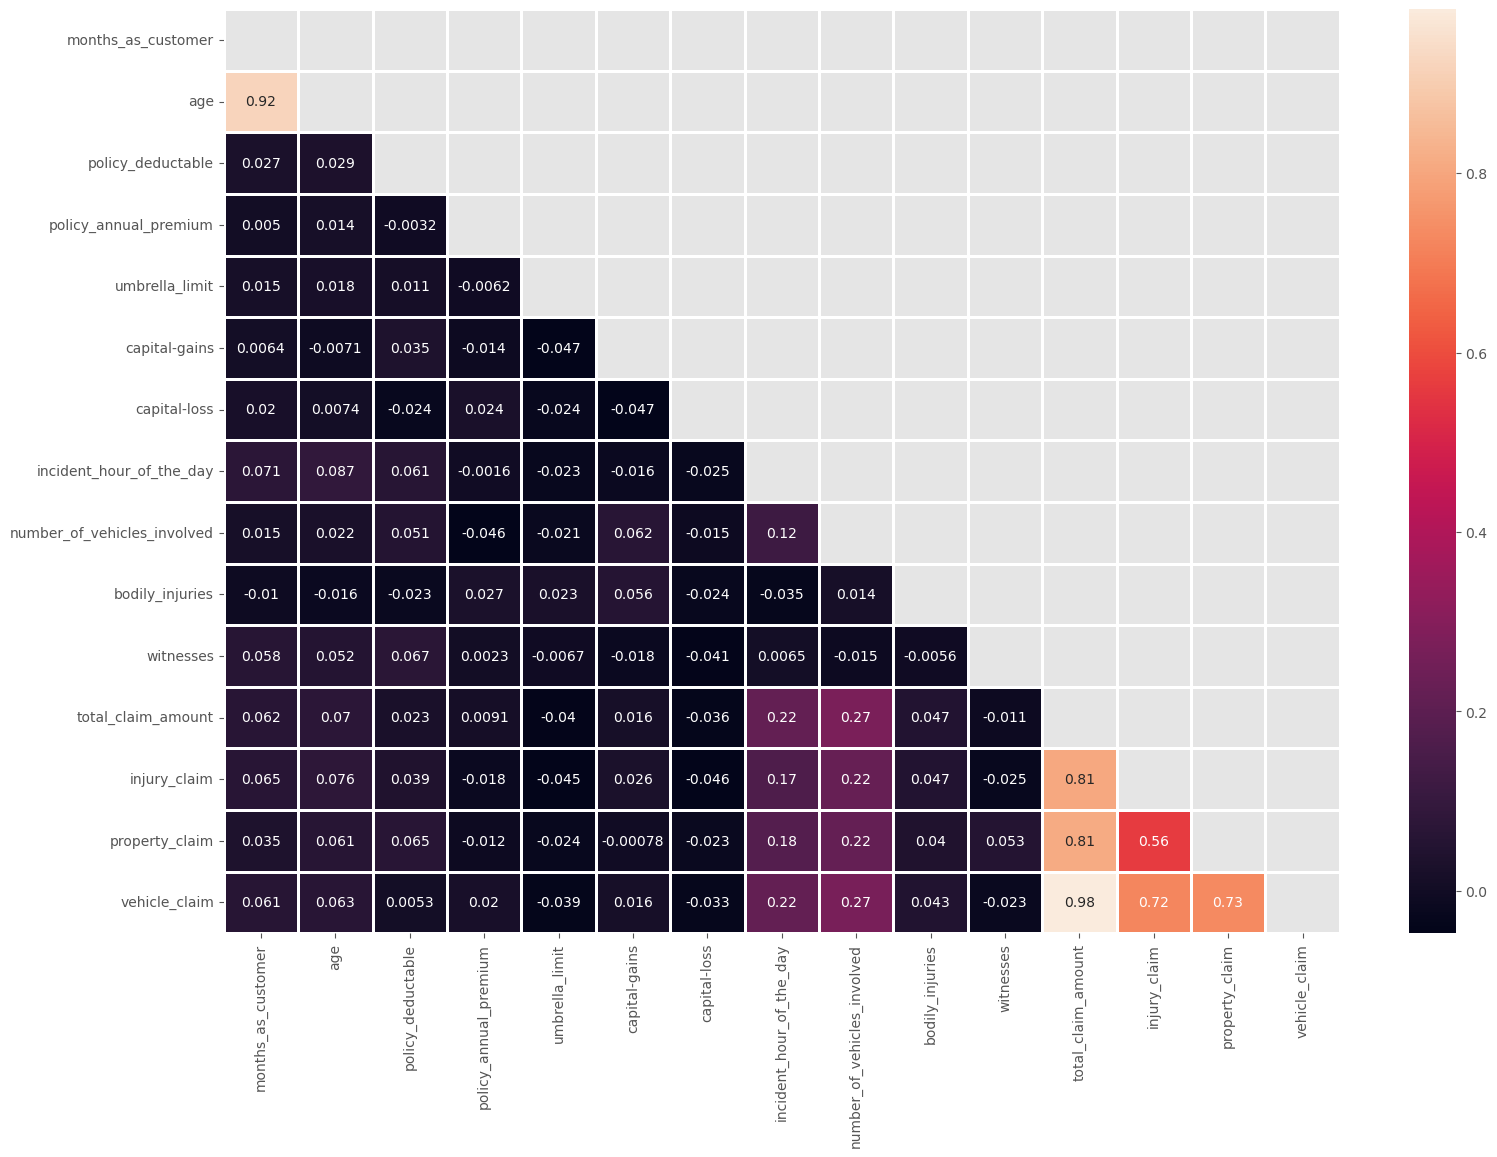

In [ ]:
# Check for multicollinearity
# If several independent variables in a model are correlated.
plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between "age and months_as_customer".We will drop the "Age" column. Also there is high correlation between "total_claim_amount, injury_claim, property_claim, vehicle_claim" as total claim is the sum of all others. So we will drop the total claim column.

In [ ]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,1300,650,4550,N


In [ ]:
# Separate the feature and target columns
# To compare the data
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [ ]:
# Replace the value 'Y' with 1 and 'N' with 0 using map()
y = y.map({'Y': 1, 'N': 0})

In [ ]:
# Split columns into data types numerical and object (categorical)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

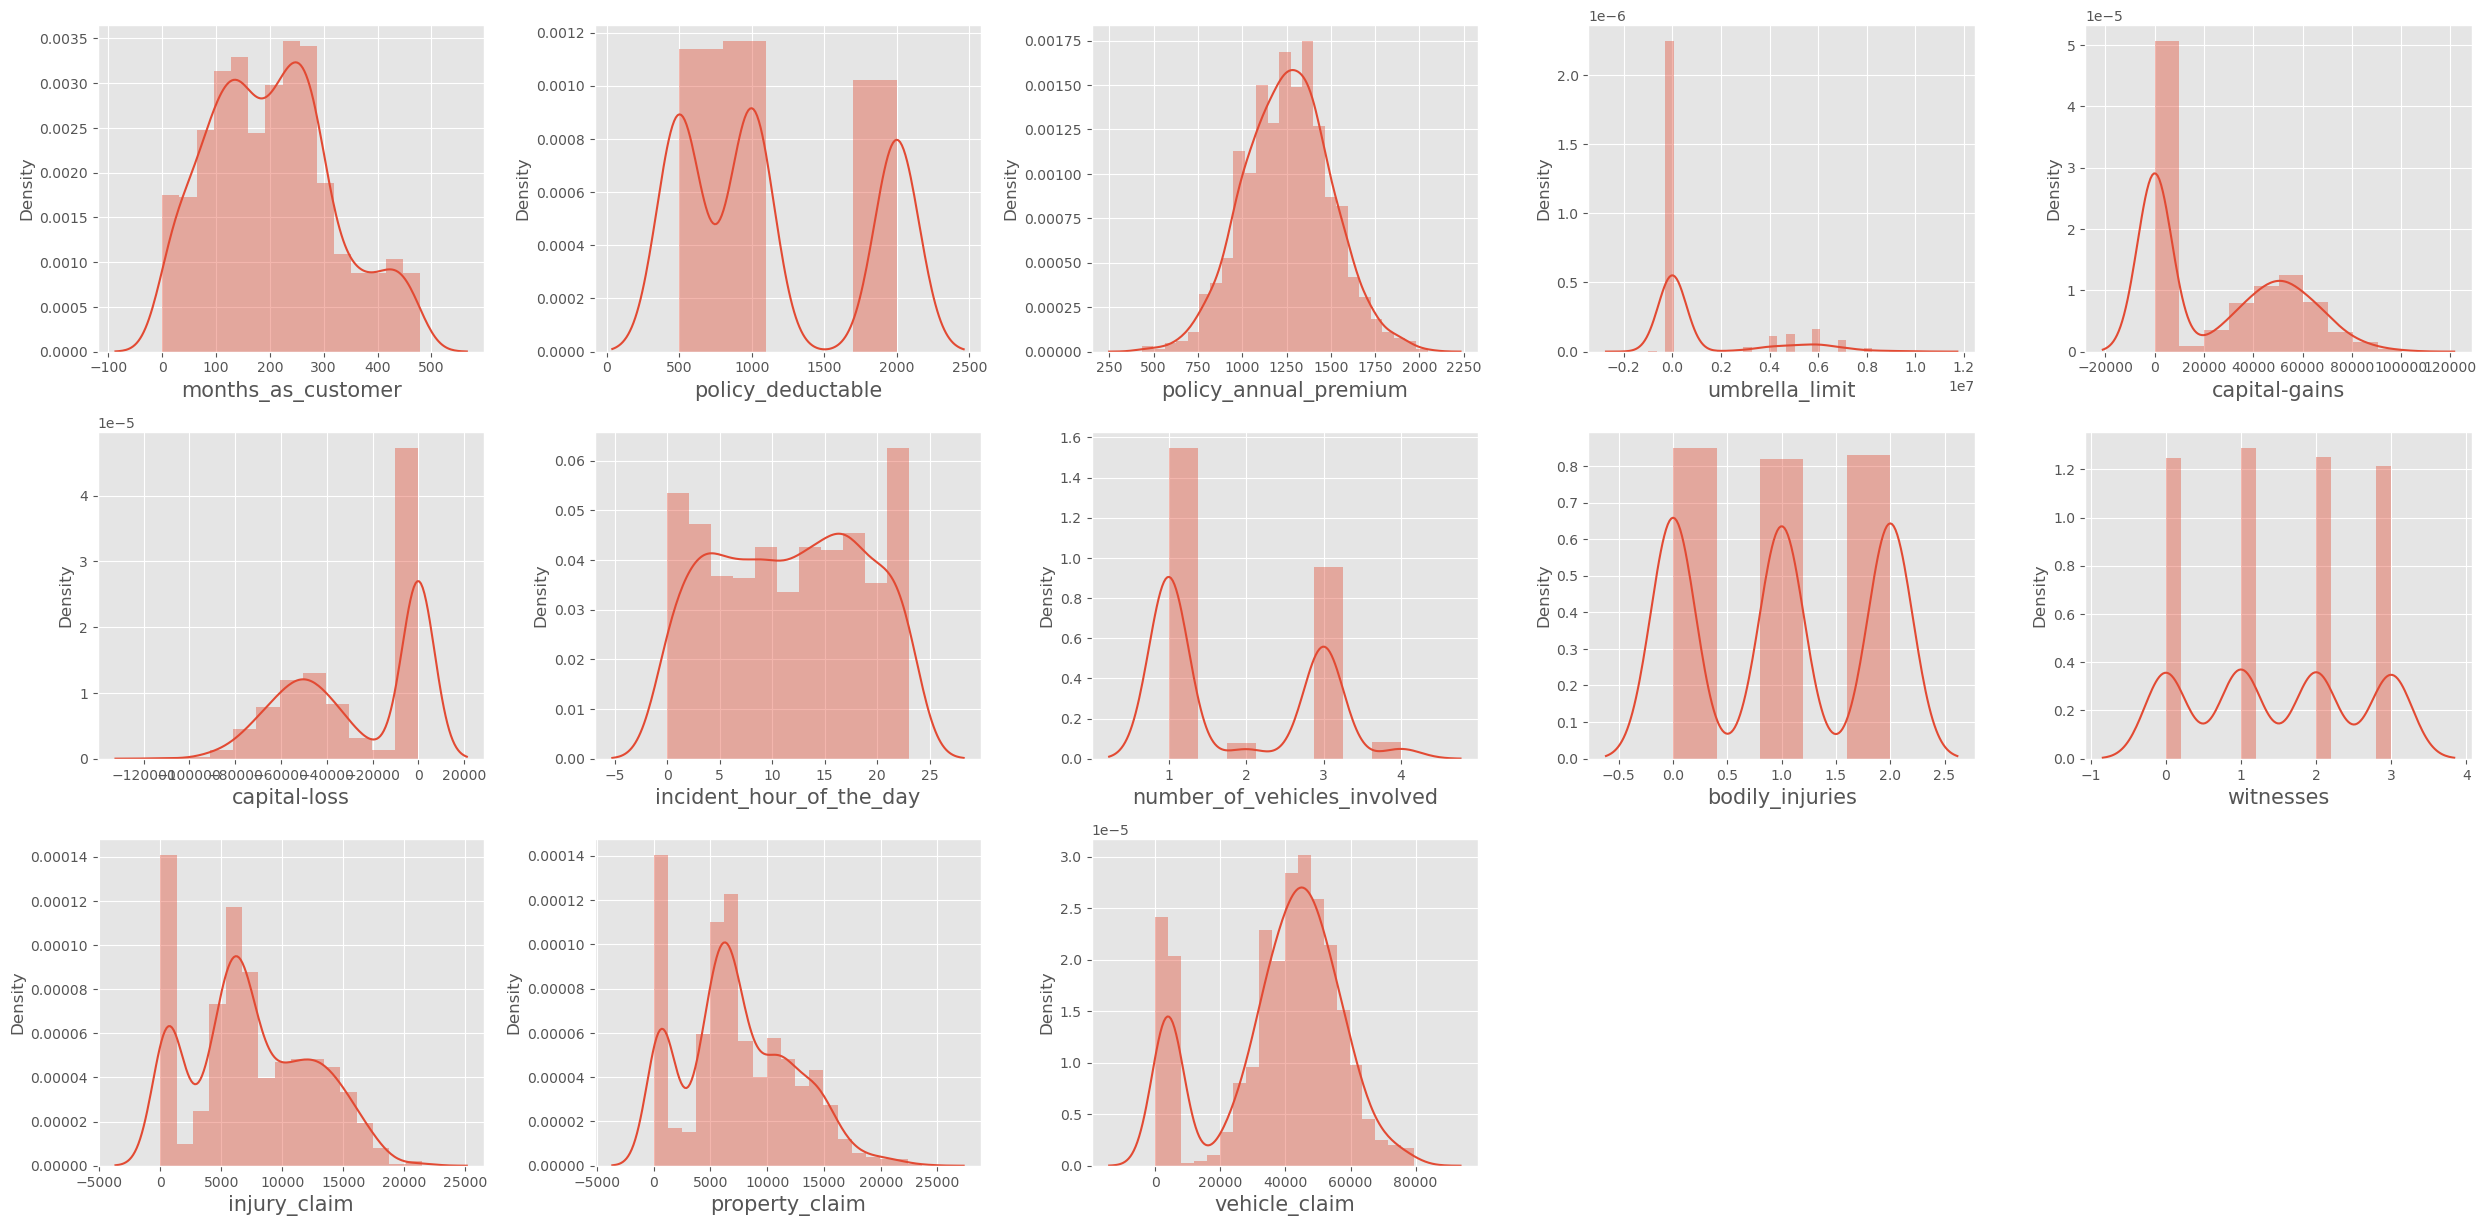

In [ ]:
# PLot visualization for the selected variable
# To show trends over time
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection

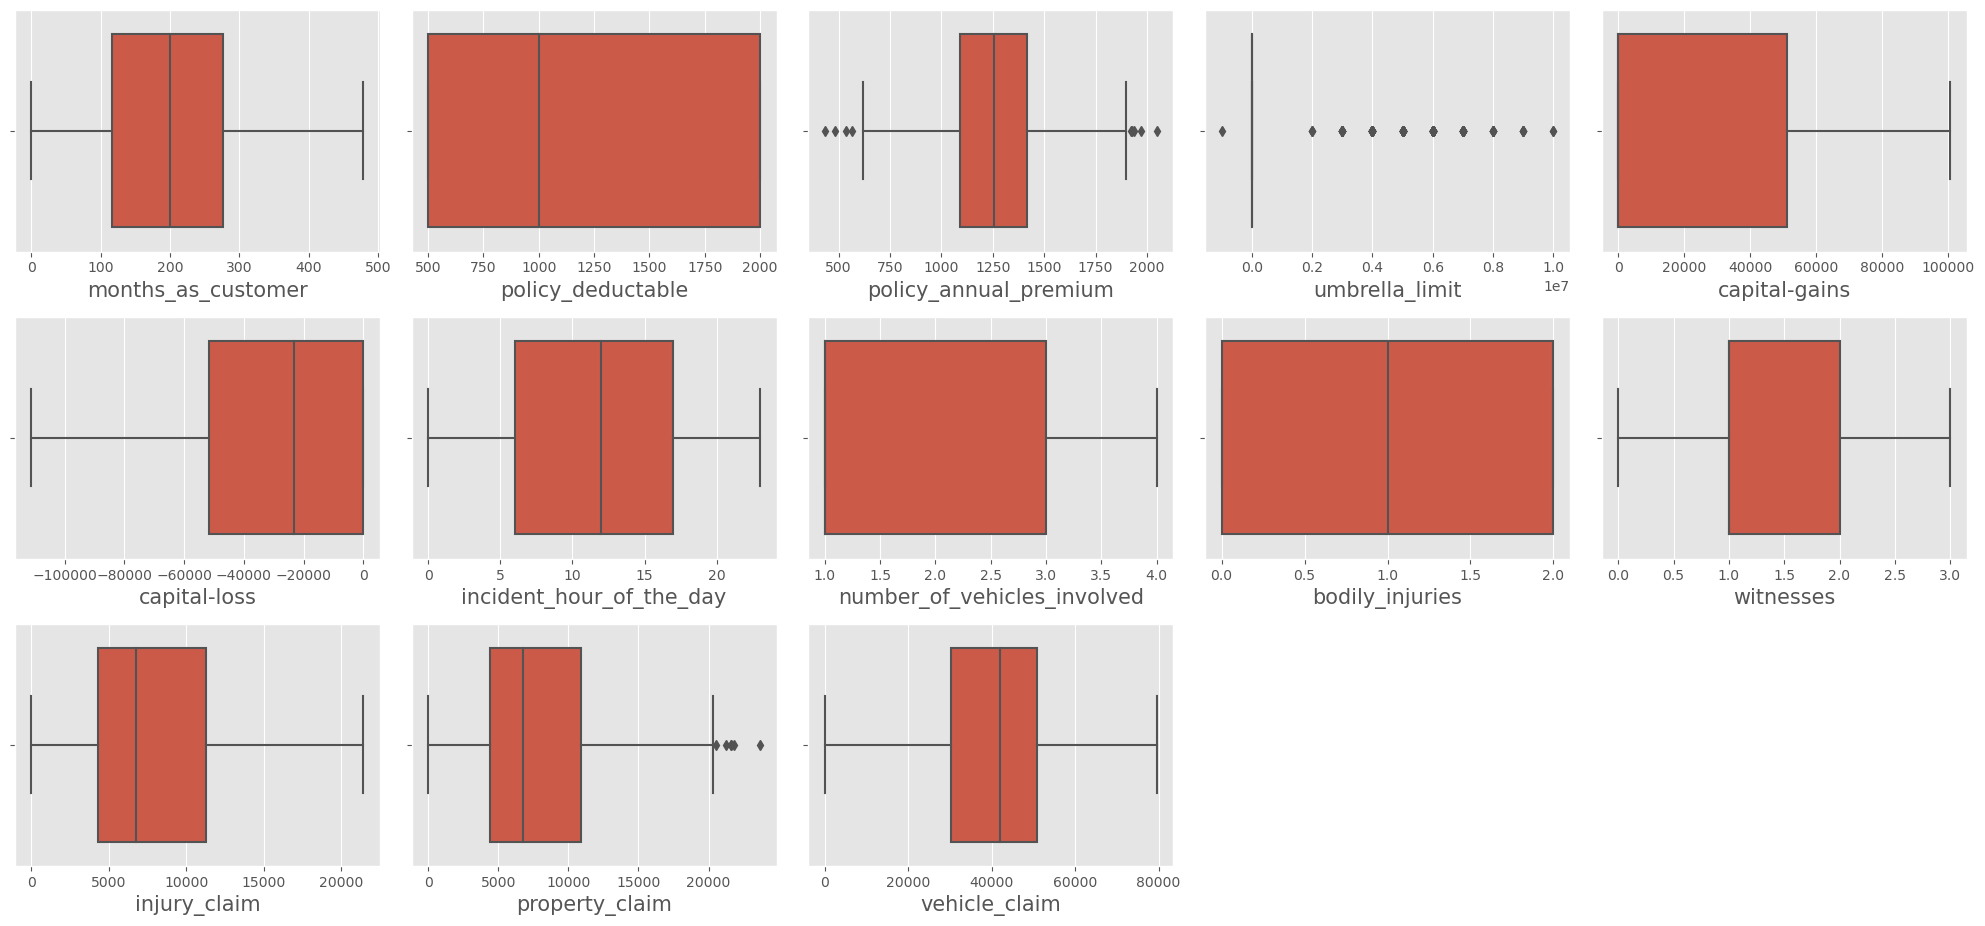

In [ ]:
# Plot boxplot for the variables
# To identify outliers
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later



# Data Pre- Processing

In [ ]:
# Perform data pre-processing by importing standardscaler
# To standardize and normalize numerical input variables for classification
from sklearn.preprocessing import StandardScaler

def scale_and_encode(df):
    # Split columns into numerical and categorical
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    # Standardize numerical columns
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    # One-hot encode categorical columns
    df = pd.get_dummies(df, columns=cat_cols,drop_first = True)

    return df

In [ ]:
# Encode categorical data into numbers
# To evaluate the model
X = scale_and_encode(X)
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES
0,1.078140,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,1.165505,0.749653,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
1,0.208995,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,-1.372696,-1.823346,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,-0.608002,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,-0.736072,-0.785565,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.452355,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,-0.219722,0.677607,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.208995,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,-1.399654,-1.768252,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Perform SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split the resampled data into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
# Create the RFE object and specify the number of features to select
num_features = 8  # Number of top features to select
from sklearn.feature_selection import RFE
rfe = RFE(estimator=dt, n_features_to_select=num_features)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Apply feature selection to both training and testing sets
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Get the top selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the feature names corresponding to the selected indices
selected_feature_names = X.columns[selected_feature_indices]

# Print the top selected feature names
print("Top 10 selected features:")
for feature_name in selected_feature_names:
    print(feature_name)

Top 10 selected features:
months_as_customer
policy_annual_premium
capital-gains
incident_hour_of_the_day
injury_claim
property_claim
vehicle_claim
incident_severity_Minor Damage
incident_severity_Total Loss
incident_severity_Trivial Damage


In [ ]:
# Define the hyperparameters to tune and their possible values
parameters = {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2]}

# Create the grid search object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, cv=5)

# Fit the grid search object to the training data with selected features
grid_search.fit(X_train_selected, y_train)

# Get the best model with tuned hyperparameters
dt_best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model's performance on the testing set with selected features
dt_accuracy = dt_best_model.score(X_test_selected, y_test)
print("Model accuracy:", dt_accuracy)

Model accuracy: 0.8377483443708609


In [ ]:
# Make predictions using the best model on the testing set with selected features
dt_predictions = dt_best_model.predict(X_test_selected)
print("Predictions:", dt_predictions)

Predictions: [0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the training accuracy of the best model
DecisionTree_train_acc = accuracy_score(y_train, dt_best_model.predict(X_train_selected))

# Calculate the test accuracy of the best model
DecisionTree_test_acc = accuracy_score(y_test, dt_predictions)

# Print the training and test accuracy of the Decision Tree
print(f"Training accuracy of Decision Tree is: {DecisionTree_train_acc}")
print(f"Test accuracy of Decision Tree is: {DecisionTree_test_acc}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

Training accuracy of Decision Tree is: 0.8588039867109635
Test accuracy of Decision Tree is: 0.8377483443708609
Confusion Matrix:
[[119  23]
 [ 26 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       142
           1       0.85      0.84      0.85       160

    accuracy                           0.84       302
   macro avg       0.84      0.84      0.84       302
weighted avg       0.84      0.84      0.84       302



In [ ]:
from sklearn import metrics

# Calculate AUC for Decision Tree
auc_dt = metrics.roc_auc_score(y_test, dt_predictions)
print("AUC for Decision Tree:", auc_dt)

# Calculate false positive rate and true positive rate for the ROC curve
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_predictions)

AUC for Decision Tree: 0.8377640845070422


In [ ]:
# Create a xgb classifier
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [ ]:
# Create the RFE object and specify the number of features to select
num_features = 10  # Number of top features to select
from sklearn.feature_selection import RFE
rfe = RFE(estimator=xgb, n_features_to_select=num_features)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Apply feature selection to both training and testing sets
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Get the top selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the feature names corresponding to the selected indices
selected_feature_names = X.columns[selected_feature_indices]

# Print the top selected feature names
print("Top 10 selected features:")
for feature_name in selected_feature_names:
    print(feature_name)

Top 10 selected features:
insured_education_level_Masters
insured_occupation_handlers-cleaners
insured_occupation_other-service
insured_occupation_priv-house-serv
insured_occupation_prof-specialty
insured_relationship_own-child
incident_severity_Minor Damage
incident_severity_Total Loss
incident_severity_Trivial Damage
incident_state_VA


In [ ]:
# Define the hyperparameters to tune and their possible values
parameters={
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the grid search object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=5)

# Fit the grid search object to the training data with selected features
grid_search.fit(X_train_selected, y_train)

# Get the best model with tuned hyperparameters
xgb_best_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model's performance on the testing set with selected features
xgb_accuracy = xgb_best_model.score(X_test_selected, y_test)
print("Model accuracy:", xgb_accuracy)

Model accuracy: 0.8311258278145696


In [ ]:
# Make predictions using the best model on the testing set with selected features
xgb_predictions = xgb_best_model.predict(X_test_selected)
print("Predictions:", xgb_predictions)

Predictions: [0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the training accuracy of the best model
XGBoost_train_acc = accuracy_score(y_train, xgb_best_model.predict(X_train_selected))

# Calculate the test accuracy of the best model
XGBoost_test_acc = accuracy_score(y_test, xgb_predictions)

# Print the training and test accuracy of the Decision Tree
print(f"Training accuracy of XGBoost is: {XGBoost_train_acc}")
print(f"Test accuracy of XGBoost is: {XGBoost_test_acc}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))

Training accuracy of XGBoost is: 0.8704318936877077
Test accuracy of XGBoost is: 0.8311258278145696
Confusion Matrix:
[[124  18]
 [ 33 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       142
           1       0.88      0.79      0.83       160

    accuracy                           0.83       302
   macro avg       0.83      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



In [ ]:
from sklearn import metrics

# Calculate AUC for XGBoost
auc_xgb = metrics.roc_auc_score(y_test, xgb_predictions)
print("AUC for XGBoost:", auc_xgb)

# Calculate false positive rate and true positive rate for the ROC curve
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, xgb_predictions)

AUC for XGBoost: 0.8334947183098591


In [ ]:
# Create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
# Create the RFE object and specify the number of features to select
num_features = 10  # Number of top features to select
from sklearn.feature_selection import RFE
rfe = RFE(estimator=rf, n_features_to_select=num_features)

# Fit the RFE object to the training data
rfe.fit(X_train, y_train)

# Apply feature selection to both training and testing sets
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Get the top selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get the feature names corresponding to the selected indices
selected_feature_names = X.columns[selected_feature_indices]

# Print the top selected feature names
print("Top 10 selected features:")
for feature_name in selected_feature_names:
    print(feature_name)

Top 10 selected features:
months_as_customer
policy_annual_premium
capital-gains
capital-loss
incident_hour_of_the_day
injury_claim
property_claim
vehicle_claim
incident_severity_Minor Damage
incident_severity_Total Loss


In [ ]:
# Define the hyperparameters to tune and their possible values
parameters = {
    'n_estimators': [100, 200, 300],
                 'max_depth': [None, 5, 10],
                 'min_samples_split': [2, 5, 10]}

# Create the grid search object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=5)

# Fit the grid search object to the training data with selected features
grid_search.fit(X_train_selected, y_train)

# Get the best model with tuned hyperparameters
rf_best_model = grid_search.best_estimator_

# Save the best model
joblib.dump(rf_best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
# Evaluate the best model's performance on the testing set with selected features
rf_accuracy = rf_best_model.score(X_test_selected, y_test)
print("Model accuracy:", rf_accuracy)

Model accuracy: 0.8509933774834437


In [ ]:
# Make predictions using the best model on the testing set with selected features
rf_predictions = rf_best_model.predict(X_test_selected)
print("Predictions:", rf_predictions)

Predictions: [0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the training accuracy of the best model
RandomForest_train_acc = accuracy_score(y_train, rf_best_model.predict(X_train_selected))

# Calculate the test accuracy of the best model
RandomForest_test_acc = accuracy_score(y_test, rf_predictions)

# Print the training and test accuracy of the Decision Tree
print(f"Training accuracy of Random Forest is: {RandomForest_train_acc}")
print(f"Test accuracy of Random Forest is: {RandomForest_test_acc}")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Training accuracy of Random Forest is: 1.0
Test accuracy of Random Forest is: 0.8509933774834437
Confusion Matrix:
[[120  22]
 [ 23 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       142
           1       0.86      0.86      0.86       160

    accuracy                           0.85       302
   macro avg       0.85      0.85      0.85       302
weighted avg       0.85      0.85      0.85       302



In [ ]:
from sklearn import metrics

# Calculate AUC for Random Forest
auc_rf = metrics.roc_auc_score(y_test, rf_predictions)
print("AUC for Random Forest:", auc_xgb)

# Calculate false positive rate and true positive rate for the ROC curve
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, rf_predictions)

AUC for Random Forest: 0.8334947183098591


In [ ]:
models=pd.DataFrame({
    'Model':['Decision Tree', 'XgBoost', 'Random Forest'],
    'Score':[DecisionTree_test_acc, XGBoost_test_acc, RandomForest_test_acc]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest,0.850993
0,Decision Tree,0.837748
1,XgBoost,0.831126


# Result

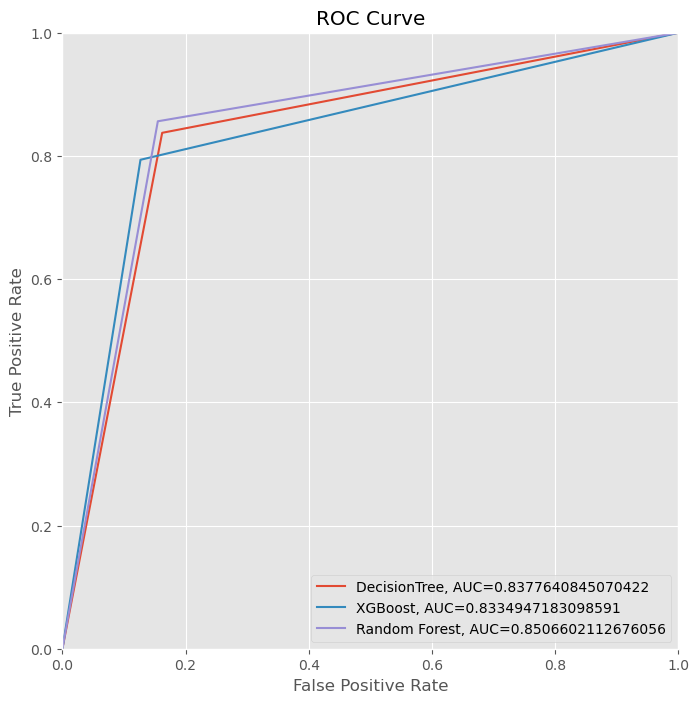

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")

plt.plot(fpr_dt,tpr_dt,label="DecisionTree, AUC="+str(auc_dt))
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, AUC="+str(auc_xgb))
plt.plot(fpr_rf,tpr_rf,label="Random Forest, AUC="+str(auc_rf))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()